In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor #转换图像数据为张量
from sklearn.datasets import fetch_olivetti_faces
from torch.utils.data import DataLoader #数据加载器

In [13]:
olivetti_faces = fetch_olivetti_faces(data_home='./face_data',shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


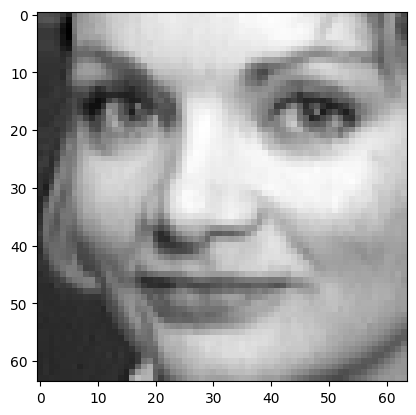

In [12]:
import matplotlib.pyplot as plt
face =olivetti_faces.images[23]
plt.imshow(face,cmap='gray')
plt.show()

In [42]:
image = torch.tensor(olivetti_faces.data)
targer = torch.tensor(olivetti_faces.target,dtype=torch.long)
print(image.shape)
print(targer.shape)

torch.Size([400, 4096])
torch.Size([400])


In [43]:
dataset = [(img,lbl) for img,lbl in zip(image,targer)]
dataset[0]

(tensor([0.6694, 0.6364, 0.6488,  ..., 0.0868, 0.0826, 0.0744]), tensor(13))

In [52]:
dataloader= torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)


In [45]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.ReLU(),
    nn.Linear(8192, 16384),
    nn.BatchNorm1d(16384),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(16384, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(1024, 40)
).to(device)

In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
optimizer1 = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [48]:
host_hist=[]
for i in range(10):
    for img,lbl in dataloader:
        img,lbl = img.to(device),lbl.to(device).long()
        result = model(img)
        loss = criterion(result,lbl)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        host_hist.append(loss.item())
        print(f'loss:{loss.item():4f}')

loss:3.778223
loss:3.473765
loss:4.095573
loss:3.621754
loss:3.499749
loss:3.990173
loss:3.372522
loss:4.063202
loss:3.453093
loss:4.259170
loss:2.860186
loss:3.715127
loss:3.979190
loss:3.477917
loss:3.744383
loss:3.150781
loss:3.108062
loss:3.050742
loss:3.502960
loss:3.798606
loss:3.046688
loss:3.425071
loss:4.180214
loss:4.021621
loss:2.556285
loss:2.724553
loss:3.517660
loss:3.014106
loss:3.499392
loss:2.804754
loss:3.127069
loss:3.116609
loss:3.029609
loss:3.107319
loss:2.998176
loss:3.062966
loss:2.722773
loss:2.475584
loss:2.817554
loss:3.075963
loss:2.389076
loss:2.406342
loss:2.883773
loss:3.107916
loss:2.088571
loss:2.066226
loss:1.439389
loss:2.112961
loss:2.326127
loss:2.752367
loss:2.398437
loss:2.751267
loss:2.876567
loss:2.113683
loss:2.263072
loss:2.291829
loss:1.980292
loss:2.193104
loss:2.482946
loss:2.214832
loss:2.940427
loss:1.920397
loss:1.790433
loss:1.834807
loss:3.308233
loss:2.526295
loss:1.790307
loss:2.667769
loss:2.199806
loss:2.708986
loss:1.423066
loss:2

In [ ]:

host_hist1=[]
for i in range(10):
    for img,lbl in dataloader:
        img,lbl = img.to(device),lbl.to(device).long()
        result = model(img)
        loss = criterion(result,lbl)
        loss.backward()
        optimizer1.step()
        optimizer1.zero_grad()

        host_hist1.append(loss.item())
        print(f'loss:{loss.item():4f}')

loss:0.171042
loss:0.088578
loss:0.503109
loss:1.006307
loss:0.264207
loss:1.408849
loss:0.215356
loss:0.483460
loss:0.218210
loss:0.740046
loss:0.740773
loss:0.350740
loss:1.404884
loss:0.365760
loss:0.076582
loss:0.153685
loss:0.608984
loss:1.135720
loss:0.761052
loss:1.370403
loss:0.265102
loss:0.739136
loss:1.134653
loss:0.169133
loss:0.764389
loss:0.417366
loss:0.784980
loss:0.892714
loss:0.949486
loss:0.183148
loss:0.298505
loss:0.061248
loss:0.752596
loss:0.111405
loss:0.152410
loss:0.839887
loss:0.310843
loss:0.459781
loss:0.707400
loss:0.659111
loss:0.631685
loss:0.774876
loss:1.161870
loss:0.071772
loss:0.456023
loss:0.154401
loss:0.965875
loss:0.130735
loss:0.489912
loss:0.329228
loss:0.663441
loss:1.814422
loss:0.695111
loss:0.200931
loss:0.466211
loss:0.323532
loss:0.266821
loss:0.097301
loss:0.173863
loss:0.433999
loss:0.403357
loss:0.061169
loss:0.436519
loss:0.435627
loss:0.451898
loss:0.343447
loss:0.383051
loss:0.497104
loss:0.180703
loss:0.266198
loss:0.835742
loss:0

In [50]:
def draw_tran_hist(hist):
    import matplotlib.pyplot as plt
    plt.plot(hist)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Train loss')
    plt.show()

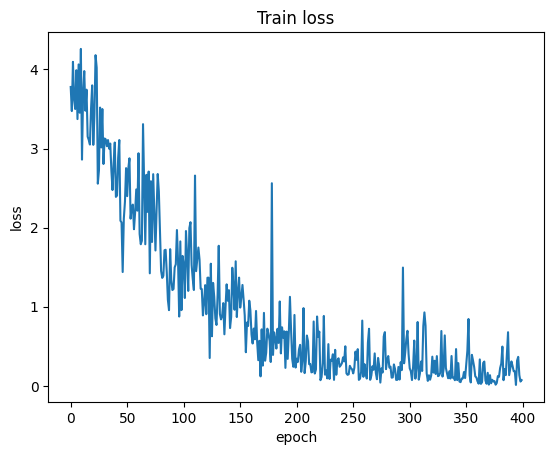

In [ ]:
draw_tran_hist(host_hist)#Adam

In [ ]:
draw_tran_hist(host_hist1)#AdamW